# SALES PREDICTION USING PYTHON

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

In [52]:
# Importing most important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

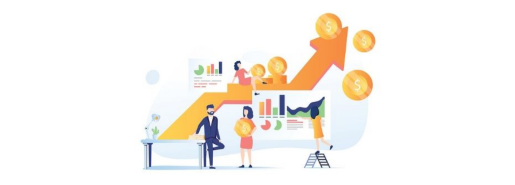

In [53]:
image = mpimg.imread('LivePlan-Headers-54.jpg')

# Display the image in the notebook
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels and ticks
plt.show()

In [54]:
# Loading the dataset
df =pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [55]:
df.shape

(200, 4)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [57]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [58]:
# checking null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA

C:\Users\MALKEET SINGH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\MALKEET SINGH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\MALKEET SINGH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\MALKEET SINGH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


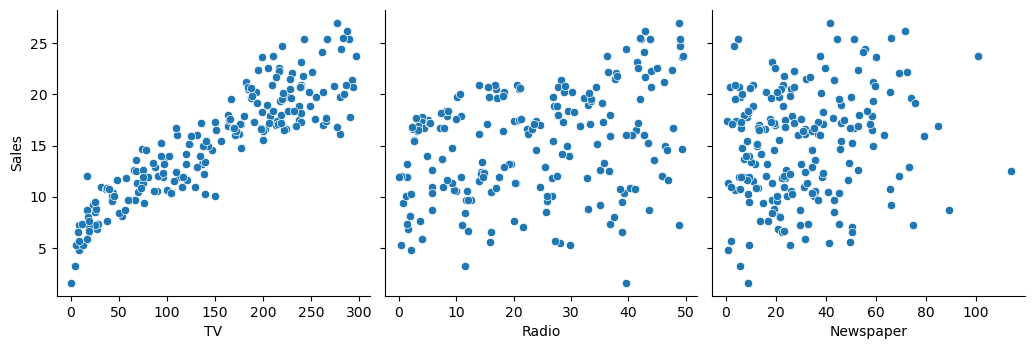

In [59]:
custom_palette = sns.color_palette("husl")
sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'],y_vars=['Sales'], kind='scatter', size = 3.5,palette=custom_palette)

# Pairplot is used to plot pairwise relationships in a dataset.

Radio vs Sales & Newspaper vs Sales are not making any linear pattern.But the relationship of TV vs Sales is linear.

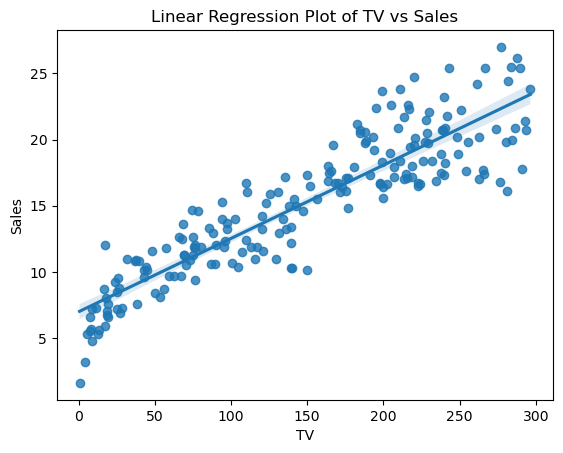

In [60]:
sns.regplot(x="TV", y="Sales", data=df)
plt.title("Linear Regression Plot of TV vs Sales")
plt.show()

# **Linear Regression** to create a model which will help us predict sales using TV column

In [61]:
#dependent and independent variables
X = df['TV']
y = df['Sales']

In [62]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [64]:
model = LinearRegression()


In [65]:
model.fit(X_train.array.reshape(-1, 1), y_train.array.reshape(-1, 1))


LinearRegression()

In [66]:
y_pred = model.predict(X_test.array.reshape(-1, 1))


In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 5.179525402166653
R-squared: 0.814855389208679


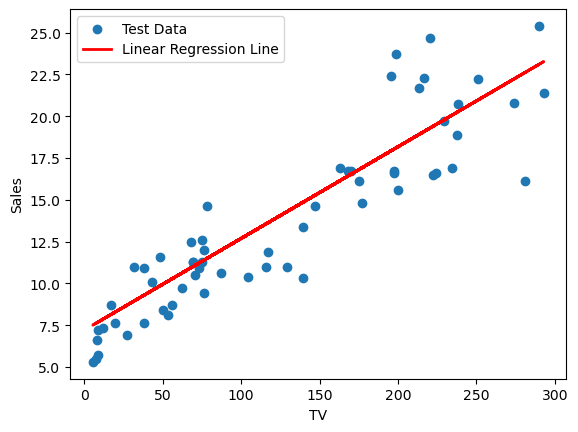

In [68]:
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Linear Regression Line")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()
